In [21]:
#install eli5 library
!pip install eli5

In [22]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler , MinMaxScaler
from sklearn.feature_selection import f_regression , SelectKBest , f_classif
pd.options.display.max_columns = 775
pd.options.display.max_rows = 775
from sklearn.metrics import r2_score , classification_report,confusion_matrix
import eli5
from sklearn.model_selection import train_test_split , cross_val_score
from eli5.sklearn import PermutationImportance
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import  LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier , AdaBoostClassifier
from tqdm import tqdm
import warnings
from sklearn.ensemble import GradientBoostingClassifier
warnings.simplefilter("ignore")

In [23]:
#connect drive with colab
from google.colab import drive

drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [24]:
# DATA LOADING
train = pd.read_csv('/content/drive/My Drive/data/train_v2.csv')
test = pd.read_csv('/content/drive/My Drive/data/test_v2.csv')

In [25]:
#check the shape of train
train.shape

(105471, 771)

In [26]:
#print the head of train
test.shape

(210944, 770)

In [27]:
# CHECKING INFORMATION
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105471 entries, 0 to 105470
Columns: 771 entries, id to loss
dtypes: float64(653), int64(99), object(19)
memory usage: 620.4+ MB


In [28]:
# TRAIN DATA DESCRIPTION
train.describe()

,id,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40,f41,f42,f43,f44,f45,f46,f47,f48,f49,f50,f51,f52,f53,f54,f55,f56,f57,f58,f59,f60,f61,f62,f63,f64,f65,f66,f67,f68,f69,f70,f71,f72,f73,f74,f75,f76,f77,f78,f79,f80,f81,f82,f83,f84,f85,f86,f87,f88,f89,f90,f91,f92,f93,f94,f95,f96,f97,f98,f99,f100,f101,f102,f103,f104,f105,f106,f107,f108,f109,f110,f111,f112,f113,f114,f115,f116,f117,f118,f119,f120,f121,f122,f123,f124,f125,f126,f127,f128,f129,f130,f131,f132,f133,f134,f135,f136,f139,f140,f141,f142,f143,f144,f145,f146,f147,f148,f149,f150,f151,f152,f153,f154,f155,f156,f157,f158,f159,f160,f161,f162,f163,f164,f165,f166,f167,f168,f169,f170,f171,f172,f173,f174,f175,f176,f177,f178,f179,f180,f181,f182,f183,f184,f185,f186,f187,f188,f189,f190,f191,f192,f193,f194,f195,f196,f197,f198,f199,f200,f201,f202,f203,f204,f205,f208,f209,f210,f211,f212,f213,f214,f215,f216,f217,f218,f219,f220,f221,f222,f223,f224,f225,f226,f227,f228,f229,f230,f231,f232,f233,f234,f235,f236,f237,f238,f239,f240,f241,f242,f243,f244,f245,f246,f247,f248,f249,f250,f251,f252,f253,f254,f255,f256,f257,f258,f259,f260,f261,f262,f263,f264,f265,f266,f267,f268,f269,f270,f271,f272,f273,f274,f275,f278,f279,f280,f281,f282,f283,f284,f285,f286,f287,f288,f289,f290,f291,f292,f293,f294,f295,f296,f297,f298,f299,f300,f301,f302,f303,f304,f305,f306,f307,f308,f309,f310,f311,f312,f313,f314,f315,f316,f317,f318,f319,f320,f321,f322,f323,f324,f325,f326,f327,f328,f329,f330,f331,f332,f333,f334,f335,f336,f337,f339,f340,f341,f342,f343,f344,f345,f346,f347,f348,f349,f350,f351,f352,f353,f354,f355,f356,f357,f358,f359,f360,f361,f362,f363,f364,f365,f366,f367,f368,f369,f370,f371,f372,f373,f374,f375,f376,f377,f378,f379,f380,f381,f382,f383,f384,f385,f386,f387,f388,f389,f392,f393,f394,f395,f396,f397,f398,f399,f400,f401,f402,f403,f404,f405,f406,f407,f408,f409,f410,f411,f412,f413,f414,f415,f416,f417,f418,f421,f422,f423,f424,f425,f426,f427,f428,f429,f430,f431,f432,f433,f434,f435,f436,f437,f438,f439,f440,f441,f442,f443,f444,f445,f446,f447,f448,f449,f450,f451,f452,f453,f454,f455,f456,f457,f458,f459,f460,f461,f464,f465,f466,f467,f468,f470,f471,f475,f476,f477,f478,f479,f480,f481,f482,f483,f484,f485,f486,f487,f488,f489,f490,f491,f492,f493,f494,f495,f496,f497,f498,f499,f500,f501,f502,f503,f504,f505,f506,f507,f508,f509,f510,f511,f512,f513,f514,f515,f516,f517,f518,f519,f520,f521,f522,f523,f524,f525,f526,f527,f528,f529,f530,f531,f532,f533,f535,f536,f538,f539,f540,f541,f542,f543,f544,f545,f546,f547,f548,f549,f550,f551,f552,f553,f554,f555,f556,f557,f558,f559,f560,f561,f562,f563,f564,f565,f566,f567,f568,f569,f570,f571,f572,f573,f574,f575,f576,f577,f578,f579,f580,f581,f582,f583,f584,f585,f586,f587,f588,f589,f590,f591,f592,f593,f594,f595,f596,f597,f598,f599,f600,f601,f604,f606,f607,f608,f609,f610,f611,f612,f613,f614,f615,f616,f617,f618,f619,f620,f621,f622,f623,f624,f625,f628,f629,f630,f631,f632,f633,f634,f635,f636,f637,f638,f639,f640,f641,f642,f643,f644,f645,f646,f647,f648,f649,f650,f651,f652,f653,f654,f655,f656,f657,f658,f659,f660,f661,f662,f663,f664,f665,f666,f667,f668,f669,f670,f671,f672,f673,f674,f675,f676,f677,f678,f679,f680,f681,f682,f683,f684,f685,f686,f687,f688,f689,f690,f691,f692,f693,f694,f696,f697,f699,f700,f701,f702,f703,f704,f705,f706,f707,f708,f709,f710,f711,f712,f713,f714,f715,f716,f717,f718,f719,f720,f721,f722,f723,f724,f725,f726,f727,f728,f729,f730,f731,f732,f733,f734,f735,f736,f737,f738,f739,f740,f741,f742,f743,f744,f745,f746,f747,f748,f749,f750,f751,f752,f753,f754,f755,f756,f757,f758,f759,f760,f761,f762,f763,f764,f765,f766,f767,f768,f769,f770,f771,f772,f773,f774,f775,f776,f777,f778,loss
count,105471.000000,105471.000000,105471.000000,105471.000000,105471.000000,105471.000000,105471.000000,105289.000000,105370.000000,105471.000000,105471.000000,105471.000000,105371.000000,105423.000000,1.054710e+05,105312.000000,105448.000000,105448.000000,105011.000000,103631.000000,103773.000000,1.047730e+05,105471.000000,105471.000000,1.04773

In [29]:
# SPLITTING TARGET COLUMN INTO 0 AND 1 (make anything which is less than 1 as 0)
train.loss.loc[train.loss!=0]=1

In [30]:
#check the train 'loss' value_counts
train.loss.value_counts()

0    95688
1     9783
Name: loss, dtype: int64

In [31]:
#Checking for Duplicacy in Dataset
train.drop_duplicates().shape

(105471, 771)

In [32]:
#check the information of train
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105471 entries, 0 to 105470
Columns: 771 entries, id to loss
dtypes: float64(653), int64(99), object(19)
memory usage: 620.4+ MB


In [33]:
#change the dtype into low memory form so that extra memory is saved and as a result training model will be more faster

for col in train.select_dtypes('number'):
    train[col] = pd.to_numeric(train[col], downcast='integer')
    if train[col].dtype == 'float':
        train[col] = pd.to_numeric(train[col], downcast='float')

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105471 entries, 0 to 105470
Columns: 771 entries, id to loss
dtypes: float32(535), float64(118), int16(31), int32(13), int64(11), int8(44), object(19)
memory usage: 350.2+ MB


In [34]:
# SPLITTING DEPENDENT AND INDEPENTENT FEATURE

#create a list comprehension comprising of column names that are of int type
numerical_columns = [col for col in train.columns if train[col].dtype!='object']

#select only the numerical_columns from train
train =train[numerical_columns]

#drop the rows in which loss is null (axis=0)
train.dropna(axis = 0 ,subset= ["loss"] ,   inplace=True)

#drop 'loss' from train (independent variable)
x = train.drop(columns='loss')

#dependent varible 'loss'
y=train.loss


In [35]:
# SCALING DATA BEFORE APPLYING

#create a object os Standard scaler
scaling= StandardScaler()

#iterate over the columns and fill null values with mean and scale the dataframe
for col in x.columns:
    #train columns
    x[col].fillna(x[col].mean() , inplace = True)
    x[col] = scaling.fit_transform(x[[col]])

#make a dataframe passing x
Scaled_data = pd.DataFrame(x)

In [36]:
# PCA WITH RESEMBLING 95% OF EXACT OF THE DATASET

#create an object of PCA with n_components=0.95
principal=PCA(n_components=0.95)

#fit it on Scaled_data
principal.fit(Scaled_data)

#transform the Scaled_data
x_scaled =principal.transform(Scaled_data)

In [37]:
# INFERENCING THE SCALED AND PCA COMPONENTS
x_scaled.shape

(105471, 136)

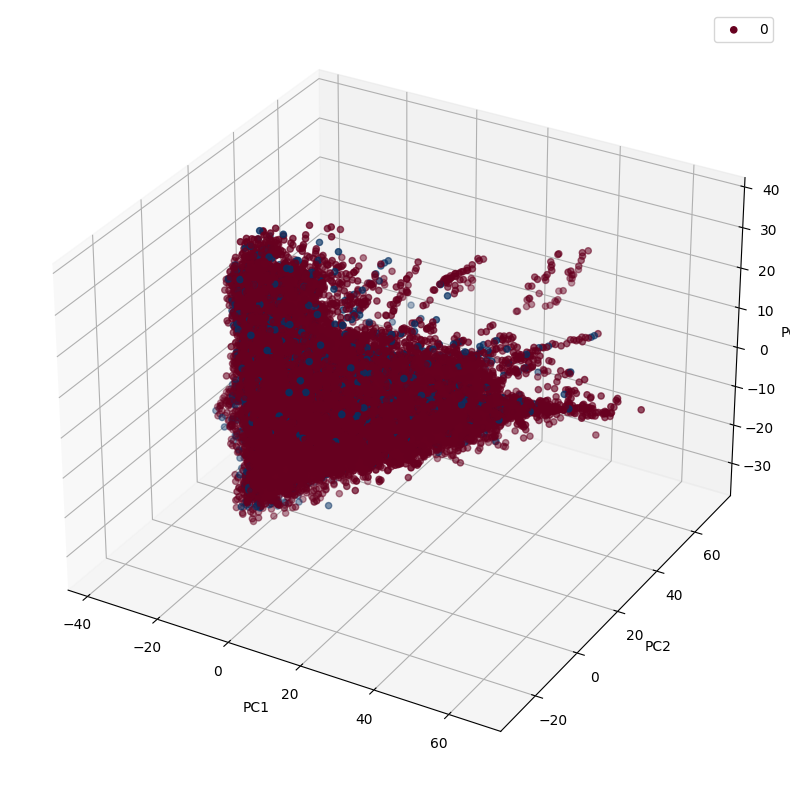

In [38]:
# TARGET COLUMN VARIES FROM 0 TO 100, THERE ARE 100 CLASSES IN IT WHICH ARE OVERLAPPING
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,10))

# choose projection 3d for creating a 3d graph
axis = fig.add_subplot(111, projection='3d')

# x[:,0]is pc1,x[:,1] is pc2 while x[:,2] is pc3
axis.scatter(x_scaled[:,0],x_scaled[:,1],x_scaled[:,2], c= y ,cmap='RdBu')
axis.set_xlabel("PC1", fontsize=10)
axis.set_ylabel("PC2", fontsize=10)
axis.set_zlabel("PC3", fontsize=10)
plt.legend([0 , 1])

Text(0.5, 0, 'PC3')

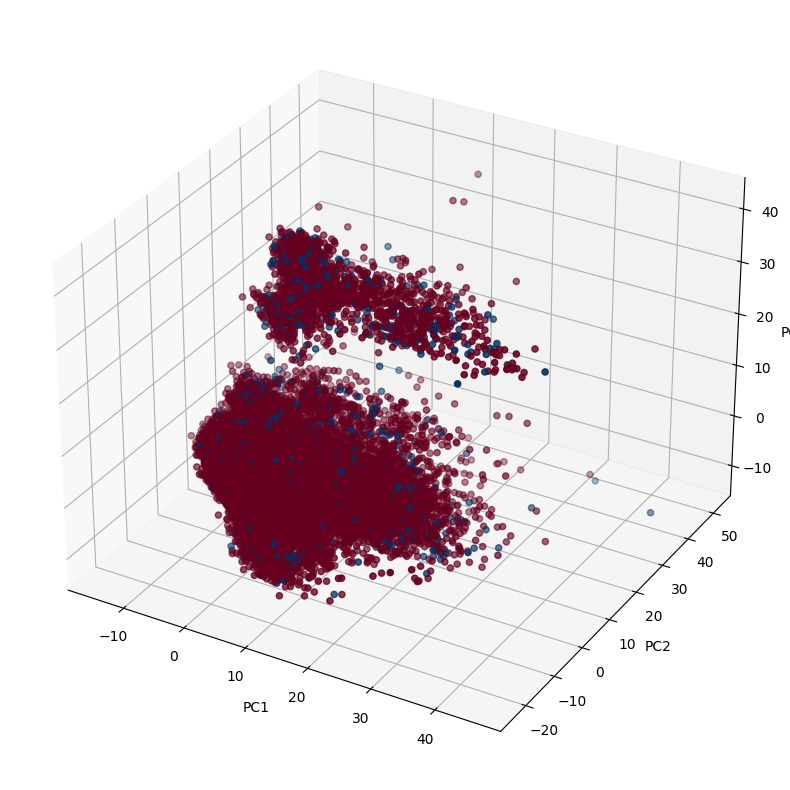

In [39]:
fig = plt.figure(figsize=(10,10))

axis = fig.add_subplot(111, projection='3d')

# x[:,0]is pc1,x[:,1] is pc2 while x[:,2] is pc3
axis.scatter(x_scaled[:,3],x_scaled[:,4],x_scaled[:,5], c= y ,cmap='RdBu')
axis.set_xlabel("PC1", fontsize=10)
axis.set_ylabel("PC2", fontsize=10)
axis.set_zlabel("PC3", fontsize=10)


Text(0.5, 0, 'PC3')

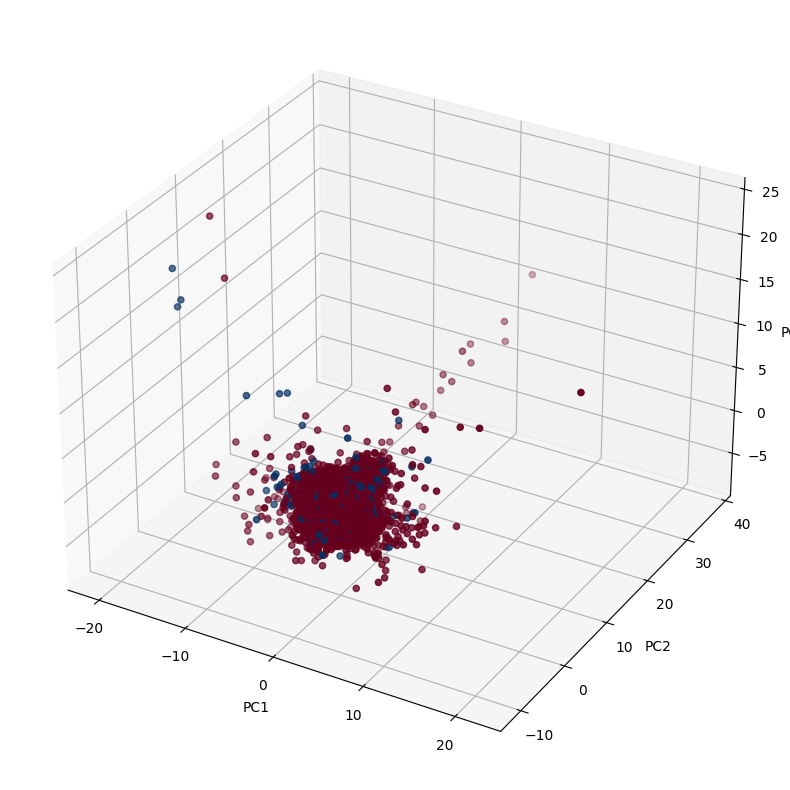

In [40]:
fig = plt.figure(figsize=(10,10))

axis = fig.add_subplot(111, projection='3d')

# x[:,0]is pc1,x[:,1] is pc2 while x[:,2] is pc3
axis.scatter(x_scaled[:,100],x_scaled[:,102],x_scaled[:,105], c= y ,cmap='RdBu')
axis.set_xlabel("PC1", fontsize=10)
axis.set_ylabel("PC2", fontsize=10)
axis.set_zlabel("PC3", fontsize=10)


In [41]:
# DATAFRAME AFTER PCA
pd.DataFrame(x_scaled)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135
0,-16.658590,7.477992,-4.633460,-3.346112,-2.981803,-3.179083,4.984231,-2.275360,-4.131422,-0.826318,-1.814937,5.050628,1.356760,-0.635433,-0.065211,0.134584,5.251860,-3.569705,1.000678,-7.454160,-2.263511,-2.275381,2.578391,1.941504,-1.085244,-0.787216,-0.009111,-0.976673,-0.177454,0.587642,1.709798,0.073405,0.894779,0.994605,-2.089418,1.326086,1.770483,0.511770,2.739136,-0.488805,-2.229457,-0.793695,1.323090,0.362113,1.391509,-0.004184,0.548426,-0.074208,0.127108,-0.937549,-0.060910,1.270100,1.555846,0.627823,-0.819644,0.573233,-0.082946,1.091681,0.925615,0.316964,-0.816069,-0.554053,1.866552,0.437756,-0.393410,-0.374818,0.585594,-0.155607,0.803440,0.501708,-0.756649,-0.377024,-0.047811,1.848630,-0.179661,0.661914,-0.540827,-0.168399,-0.396629,-0.052654,-0.954219,0.475460,0.365610,0.315976,0.915894,-1.158851,1.063063,-1.128673,0.591028,0.758736,0.426624,0.151355,-0.620294,0.188592,-0.393904,0.509199,-0.086408,0.769599,-1.364257,-0.491091,-0.002212,0.389940,0.567437,0.709264,-0.326163,0.692702,-0.487928,-0.059753,0.112035,0.969071,-0.465676,-0.050262,0.368379,-0.073949,-0.149880,0.571324,-0.662433,0.639596,0.462887,1.039653,-0.293882,0.412429,0.037721,-0.568486,0.083566,1.861148,-1.458762,-0.112055,0.247668,-0.157078,0.821546,0.074453,-0.402154,-0.344040,2.007353,-0.261104
1,2.189695,-13.578664,1.893016,-0.925884,-5.648501,2.894702,-2.197431,5.493275,0.279407,2.737511,0.452401,1.483191,1.443079,0.327238,0.336790,-1.510241,0.590133,3.874455,2.632428,-1.755843,-0.353602,-0.766808,1.152653,0.982419,-1.614268,-0.501903,-0.183728,0.442634,2.197160,0.378654,0.916647,-0.837690,1.137273,-0.324596,-1.623797,-0.680552,-1.721005,0.715994,2.892137,-0.208765,0.171050,0.874119,0.493658,-0.633691,-0.215202,0.381434,0.254754,-0.256401,0.071381,0.542626,-0.149343,-0.089728,0.856056,0.476077,-0.269071,-0.270990,0.086204,0.138571,-0.172948,-0.970720,0.760161,-0.320470,0.125741,0.700943,0.608862,-0.330389,-1.243762,-0.581209,-0.273640,-0.829115,0.670669,-1.374423,0.177301,0.797736,-0.423820,0.710373,-0.356740,-0.841465,-0.504208,0.074504,0.443777,0.214660,0.494269,-0.709675,0.210701,0.306656,0.033926,0.094341,0.310156,0.972768,-0.364586,0.859080,-1.186734,-0.450760,-0.092809,-0.441752,-0.763440,0.406759,-0.540505,-1.717169,-1.060261,1.212079,0.533835,-0.366979,-0.516613,0.379558,0.273042,0.462974,-0.571839,0.631045,0.778732,-0.414355,0.366371,0.424032,-0.288483,0.133672,0.145050,-0.104820,0.201167,0.016691,0.150985,-0.803413,0.792504,0.613328,0.065730,0.554793,-0.209789,0.112493,-1.869507,-0.875590,0.499542,-0.530371,-0.041460,0.517815,-1.535109,-0.600676
2,2.019792,-6.058516,0.748353,-4.040910,-1.076259,1.756933,-0.092934,-1.181018,-0.066574,-0.580505,0.760776,0.683723,0.155021,-1.053573,-0.803593,-0.801540,1.922225,5.176348,-1.270156,-0.631161,0.248067,1.364531,0.997283,1.104643,0.879600,-0.275277,-0.586035,0.226252,2.682895,-0.685286,0.642914,0.120381,2.178163,-1.361051,0.146298,0.809643,-0.742259,0.674184,-0.513264,-1.127725,1.783988,0.136945,-1.778275,-0.147770,0.899895,-0.246527,-0.810165,-0.432060,1.534055,0.704134,0.112904,-1.643261,0.084172,-0.269376,-1.769352,-0.493486,1.000519,-0.373149,2.235199,1.110218,0.169547,0.480596,-0.790396,-0.838355,-0.282352,-0.267668,0.603540,1.328971,-1.763104,-0.258696,-0.973197,-0.162370,-1.557976,1.737917,-1.401431,-0.152792,0.513738,0.964232,-0.817764,0.448660,0.828975,0.270811,1.686809,0.289647,-0.587382,1.072499,-0.332234,-2.021795,-0.117142,-0.496450,0.686518,-0.777098,-0.603621,0.050992,0.292998,-0.028526,0.988882,0.291144,-1.025033,-1.173382,-0.898795,1.549203,-0.093724,

In [42]:
# SUPERVISING THE NUMERICAL COLUMNS REQUIRED FROM DATASET
# DROPPING COLUMNS HAVING NULL VALUES

#create a list comprehension comprising of column names that are of int type
numerical_columns = [col for col in train.columns if train[col].dtype!='object']

#select only the numerical_columns from train
train = train[numerical_columns]

#drop the rows in which loss is null (axis=0)
train.dropna(axis=0,subset=['loss'],inplace=True)

#drop 'loss' from train (independent variable)
f1 = train.drop(columns=['loss'])

#dependent variable
t1 =train.loss


In [43]:
# IMPUTING NULL VALUES WITH MEAN VALUE AND SCALING THE DATA WITH STANDARD SCALER
scaler =StandardScaler()

#iterate over the columns and fill null values with mean and scale the dataframe
for col in f1.columns:
    #train columns
    f1[col].fillna(f1[col].mean() , inplace = True)
    f1[col] = scaler.fit_transform(f1[[col]])

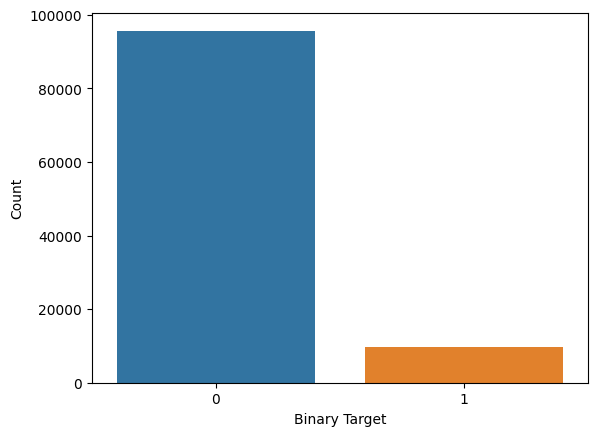

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the value counts from the 'binary_target' column
value_counts = t1.value_counts()

# Create a count plot
sns.barplot(x=value_counts.index, y=value_counts.values)

# Optionally, you can set labels for the x and y axes
plt.xlabel('Binary Target')
plt.ylabel('Count')

# Show the plot
plt.show()


In [45]:
# FINDING THE CORRELATION OF EACH COLUMN WITH TARGET COLUMN WITH CORRELATION MATRIX`

#create a empty list corr_data
corr_data = []

#apply the .corr() fucntion on the columns using loop
for col in f1:
    #check the co-relation of 'loss' with other columns
    corr = train['loss'].corr(train[col])
    if not np.isnan(corr):
        corr_data.append([col, abs(corr)])

#create a dataframe storing the correlation values
corr_data = pd.DataFrame(corr_data, columns = ['column_name','% corr']).sort_values(by = '% corr', ascending = False)

#print the first 10 rows of corr_data
corr_data.head(10)

,column_name,% corr
727,f766,0.134531
388,f404,0.134485
309,f322,0.123838
389,f405,0.120804
728,f767,0.120789
268,f281,0.118078
645,f676,0.115552
726,f765,0.115552
598,f629,0.112960
729,f768,0.111261


<Axes: xlabel='f766', ylabel='Count'>

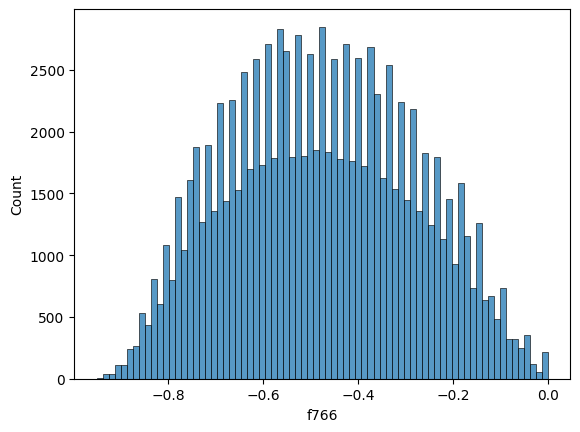

In [46]:
#plot the hist plot of 'f766'
sns.histplot(train.f766)

<Axes: xlabel='f404', ylabel='Count'>

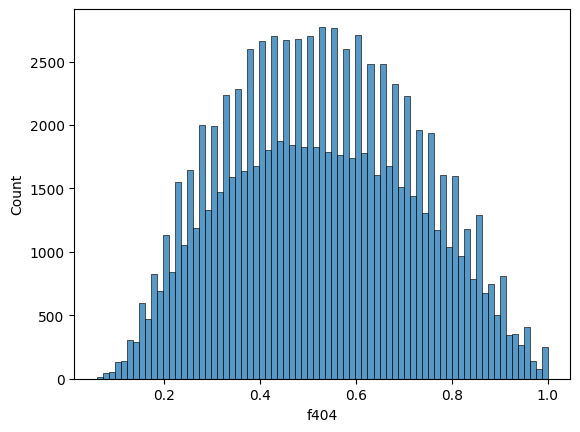

In [47]:
#plot the hist plot of 'f404'
sns.histplot(train.f404)

<Axes: xlabel='f322', ylabel='Count'>

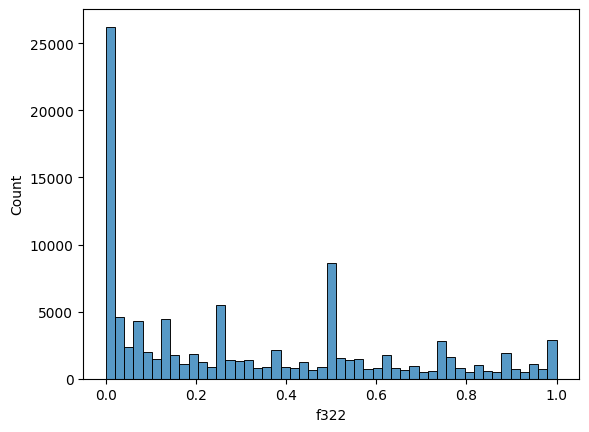

In [48]:
#plot the hist plot of 'f322'
sns.histplot(train.f322)

<Axes: xlabel='f405', ylabel='Count'>

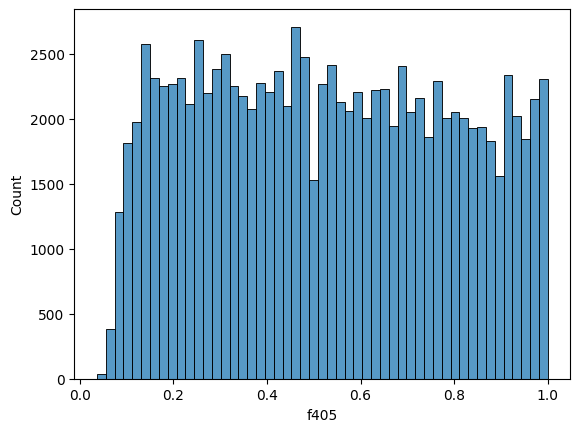

In [49]:
#plot the hist plot of 'f405'
sns.histplot(train.f405)

<Axes: xlabel='f767', ylabel='Count'>

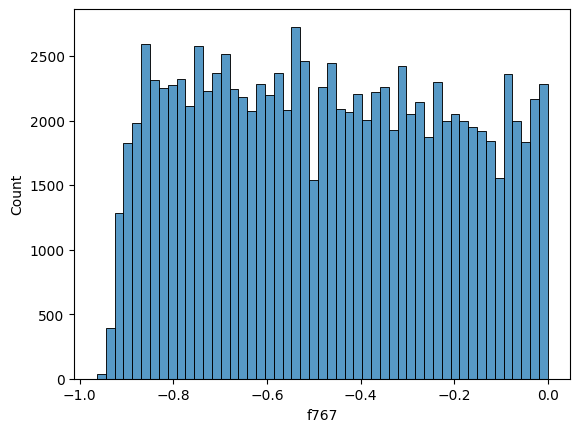

In [50]:
#plot the hist plot of 'f767'
sns.histplot(train.f767)

In [51]:
#create a train-test split of the top 10 columns  we got as the output of PCA
f2 = train[corr_data[:10]["column_name"]]

#store loss in t2
t2 = train.loss


for col in f2.columns:

    #fill all the na values with mean
    f2[col].fillna(f2[col].mean() , inplace = True)

#train-test split of f2,t2
X_train1, X_test1, y_train1, y_test1 = train_test_split(f2,t2,test_size=0.2,random_state=30)

In [52]:
from collections import Counter
from imblearn.combine import SMOTETomek

# Assuming you have X_train1 and y_train1 from the previous code
X=X_train1
y=y_train1
# Print the original class distribution
print('Original dataset shape %s' % Counter(y))

# Create a SMOTETomek object
sm = SMOTETomek(random_state=42)

# Use the fit_resample function to balance the dataset
X_train_balanced, y_train_balanced = sm.fit_resample(X,y)

# Print the balanced dataset shape
print('Balanced dataset shape %s' % Counter(y_train_balanced))

# Now, X_train_balanced and y_train_balanced contain the balanced training data


Original dataset shape Counter({0: 76582, 1: 7794})
Balanced dataset shape Counter({1: 75753, 0: 75753})


In [53]:
#check the shape of X_train_balanced
X_train_balanced.shape

(151506, 10)

In [54]:
#we will create this model just to get a basic idea of the training
#create a random forest model and fit X_train_balanced,y_train_balanced

#create  a object with n_estimatios=300,criteria='entropy'
model = RandomForestClassifier(n_estimators=300, criterion='entropy')

# Fit the model on the balanced training data
model.fit(X_train_balanced, y_train_balanced)

RandomForestClassifier(criterion='entropy', n_estimators=300)

In [55]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test1)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test1, y_pred))

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test1, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95     19106
           1       0.16      0.02      0.04      1989

    accuracy                           0.90     21095
   macro avg       0.53      0.51      0.49     21095
weighted avg       0.84      0.90      0.86     21095

Confusion Matrix:
[[18862   244]
 [ 1942    47]]


In [58]:
lr_model = LogisticRegression()
lr_model.fit(X_train_balanced, y_train_balanced)

# Evaluate the Logistic Regression model
lr_y_pred = lr_model.predict(X_test1)
lr_classification_report = classification_report(y_test1, lr_y_pred)
lr_confusion_matrix = confusion_matrix(y_test1, lr_y_pred)

print("Logistic Regression Classification Report:")
print(lr_classification_report)
print("Logistic Regression Confusion Matrix:")
print(lr_confusion_matrix)

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.57      0.71     19106
           1       0.14      0.66      0.23      1989

    accuracy                           0.57     21095
   macro avg       0.54      0.61      0.47     21095
weighted avg       0.86      0.57      0.66     21095

Logistic Regression Confusion Matrix:
[[10803  8303]
 [  682  1307]]


In [60]:

# example of grid searching key hyperparametres for logistic regression

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
# define dataset
X, y = X_train_balanced , y_train_balanced


# define logisticregression model and parameters
model = LogisticRegression()

solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]


# create a dictionary with the above hyper-parameters
grid = dict(solver=solvers,penalty=penalty,C=c_values)


#create a object of  RepeatedStratifiedKFold with n_splits=10, n_repeats=3
cv = RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=1)

#create a gridsearchcv object with these hyperparameters and scoring='accuracy',error_score=0
grid_search =GridSearchCV(estimator=model,param_grid=grid,n_jobs=-1,scoring='accuracy',error_score=0)

#fit the model on X,y
grid_result =grid_search.fit(X,y)


# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.604894 using {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.604689 (0.000616) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.604808 (0.000487) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.604861 (0.000400) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.604894 (0.000640) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.604702 (0.000504) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.604867 (0.000541) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.604656 (0.000592) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.604630 (0.000583) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.604689 (0.000755) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.604544 (0.000994) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.604399 (0.000927) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.604491 (0.000868) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.604154 (0.000665) with

In [63]:

y_pred = .predict(X_test1)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test1, y_pred))

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test1, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.56      0.71     19106
           1       0.14      0.66      0.22      1989

    accuracy                           0.57     21095
   macro avg       0.54      0.61      0.47     21095
weighted avg       0.86      0.57      0.66     21095

Confusion Matrix:
[[10789  8317]
 [  683  1306]]
